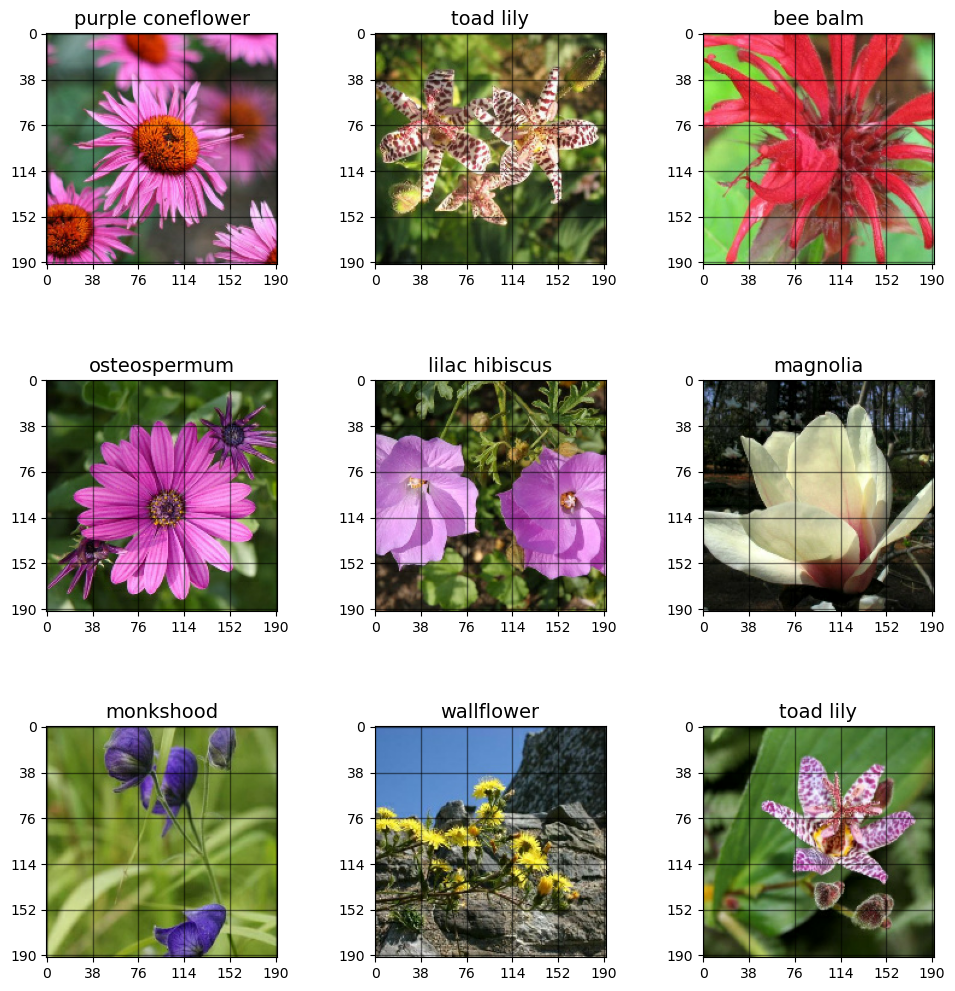

In [30]:
import os
import random
import matplotlib.pyplot as plt

DATA_PATH = '/kaggle/input/flower-classification/Data/'
TRAIN_PATH = os.path.join(DATA_PATH, 'train')
CLASSES_FILE = os.path.join(DATA_PATH, 'Classes.txt')
TEST_PATH=os.path.join(DATA_PATH, 'test')
# List of flower classes
CLASSES = ['pink primrose',    'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea',     'wild geranium',     'tiger lily',           'moon orchid',              'bird of paradise', 'monkshood',        'globe thistle',         # 00 - 09
           'snapdragon',       "colt's foot",               'king protea',      'spear thistle', 'yellow iris',       'globe-flower',         'purple coneflower',        'peruvian lily',    'balloon flower',   'giant white arum lily', # 10 - 19
           'fire lily',        'pincushion flower',         'fritillary',       'red ginger',    'grape hyacinth',    'corn poppy',           'prince of wales feathers', 'stemless gentian', 'artichoke',        'sweet william',         # 20 - 29
           'carnation',        'garden phlox',              'love in the mist', 'cosmos',        'alpine sea holly',  'ruby-lipped cattleya', 'cape flower',              'great masterwort', 'siam tulip',       'lenten rose',           # 30 - 39
           'barberton daisy',  'daffodil',                  'sword lily',       'poinsettia',    'bolero deep blue',  'wallflower',           'marigold',                 'buttercup',        'daisy',            'common dandelion',      # 40 - 49
           'petunia',          'wild pansy',                'primula',          'sunflower',     'lilac hibiscus',    'bishop of llandaff',   'gaura',                    'geranium',         'orange dahlia',    'pink-yellow dahlia',    # 50 - 59
           'cautleya spicata', 'japanese anemone',          'black-eyed susan', 'silverbush',    'californian poppy', 'osteospermum',         'spring crocus',            'iris',             'windflower',       'tree poppy',            # 60 - 69
           'gazania',          'azalea',                    'water lily',       'rose',          'thorn apple',       'morning glory',        'passion flower',           'lotus',            'toad lily',        'anthurium',             # 70 - 79
           'frangipani',       'clematis',                  'hibiscus',         'columbine',     'desert-rose',       'tree mallow',          'magnolia',                 'cyclamen ',        'watercress',       'canna lily',            # 80 - 89
           'hippeastrum ',     'bee balm',                  'pink quill',       'foxglove',      'bougainvillea',     'camellia',             'mallow',                   'mexican petunia',  'bromelia',         'blanket flower',        # 90 - 99
           'trumpet creeper',  'blackberry lily',           'common tulip',     'wild rose']

def visualize_images(train_path, classes, num_images=9):
    plt.figure(figsize=(12, 12))
    plt.subplots_adjust(hspace=0.5)  # Add padding between images and titles
    
    for i in range(num_images):
        # Select a random class and image from the dataset
        random_class = str(random.randrange(len(classes)))
        class_path = os.path.join(train_path, random_class)
        random_image = random.choice(os.listdir(class_path))
        image_path = os.path.join(class_path, random_image)
        
        # Load and display the image
        img = plt.imread(image_path)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.title(classes[int(random_class)], fontsize=14)
        plt.axis('on')

        # Custom grid
        ax.set_xticks(range(0, img.shape[1], img.shape[1] // 5))
        ax.set_yticks(range(0, img.shape[0], img.shape[0] // 5))
        ax.grid(color='black', linestyle='-', linewidth=1, alpha=0.5)

    plt.show()

# Visualize the first image from 9 random folders
visualize_images(TRAIN_PATH, CLASSES)

In [31]:
def display_samples_per_class():
    """Display the number of samples in each class ====>"""
    for cls in CLASSES:
        cls_path = os.path.join(TRAIN_PATH, str(CLASSES.index(cls)))
        num_samples = len(os.listdir(cls_path))
        print(f"Number of samples for class  {cls}====> {num_samples}")

# Display the number of samples in each class
display_samples_per_class()

Number of samples for class  pink primrose====> 272
Number of samples for class  hard-leaved pocket orchid====> 26
Number of samples for class  canterbury bells====> 20
Number of samples for class  sweet pea====> 21
Number of samples for class  wild geranium====> 703
Number of samples for class  tiger lily====> 87
Number of samples for class  moon orchid====> 18
Number of samples for class  bird of paradise====> 105
Number of samples for class  monkshood====> 87
Number of samples for class  globe thistle====> 84
Number of samples for class  snapdragon====> 136
Number of samples for class  colt's foot====> 43
Number of samples for class  king protea====> 92
Number of samples for class  spear thistle====> 263
Number of samples for class  yellow iris====> 227
Number of samples for class  globe-flower====> 21
Number of samples for class  purple coneflower====> 55
Number of samples for class  peruvian lily====> 50
Number of samples for class  balloon flower====> 90
Number of samples for cla

##  Flower Classification Data Preprocessing and Data Loaders 

In [51]:
import os
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

# Define paths
DATA_PATH = '/kaggle/input/flower-classification/Data/'
TRAIN_PATH = os.path.join(DATA_PATH, 'train')
TEST_PATH = os.path.join(DATA_PATH, 'test')  # Test data path for model evaluation

# Define image transformations with data augmentation
transform = transforms.Compose([
    transforms.Resize((192, 192)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the training dataset and apply transformations
train_dataset = ImageFolder(TRAIN_PATH, transform=transform)

# Split the training dataset into 90% for training and 10% for validation
train_size = int(0.9 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_data, val_data = random_split(train_dataset, [train_size, val_size])

# Create data loaders for training and validation
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)

# Load the test dataset for model evaluation (no augmentation, only scaling)
test_transform = transforms.Compose([
    transforms.Resize((192, 192)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
test_dataset = ImageFolder(TEST_PATH, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

## show after the step how the data look like |

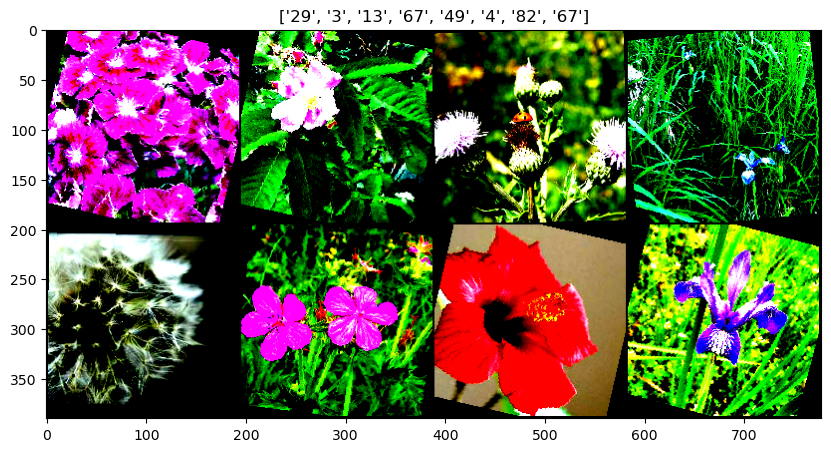

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision
def imshow(img, title=None):
    img = img.numpy().transpose((1, 2, 0))
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

# Get a batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)  # Use next(dataiter) instead of dataiter.next()

# Create a grid from the images
grid = torchvision.utils.make_grid(images[:8], nrow=4)

# Show the grid of images
plt.figure(figsize=(10, 10))
imshow(grid, title=[train_dataset.classes[label] for label in labels[:8]])

## **Building CNN model using 2D convolutions, pooling layers, etc. and train the model**

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

# Define paths
DATA_PATH = '/kaggle/input/flower-classification/Data/'
TRAIN_PATH = os.path.join(DATA_PATH, 'train')
TEST_PATH = os.path.join(DATA_PATH, 'test')  # Test data path for model evaluation

# Define image transformations with data augmentation
transform = transforms.Compose([
    transforms.Resize((192, 192)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the training dataset and apply transformations
train_dataset = ImageFolder(TRAIN_PATH, transform=transform)

# Split the training dataset into 90% for training and 10% for validation
train_size = int(0.9 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_data, val_data = random_split(train_dataset, [train_size, val_size])

# Create data loaders for training and validation
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)

# Define the CNN model architecture
class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(32 * 48 * 48, 256)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.maxpool1(out)
        out = self.conv2(out)
        out = self.relu2(out)
        out = self.maxpool2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.relu3(out)
        out = self.fc2(out)
        return out

# Initialize the CNN model
model = CNNModel(num_classes=104)

# Check if a GPU is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define number of epochs
num_epochs = 15

# Training loop
train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []

# Training loop
for epoch in range(num_epochs):
    train_loss = 0.0
    train_correct = 0.0
    val_loss = 0.0
    val_correct = 0.0
    
    # Training phase
    model.train()
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Calculate training accuracy
        _, preds = torch.max(outputs, 1)
        train_correct += torch.sum(preds == labels.data)
        train_loss += loss.item() * images.size(0)
    
    # Validation phase
    model.eval()
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # Calculate validation accuracy
            _, preds = torch.max(outputs, 1)
            val_correct += torch.sum(preds == labels.data)
            val_loss += loss.item() * images.size(0)
    
    # Calculate average training and validation loss
    train_loss = train_loss / len(train_data)
    val_loss = val_loss / len(val_data)
    
    # Calculate average training and validation accuracy
    train_acc = train_correct.double() / len(train_data)
    val_acc = val_correct.double() / len(val_data)
    
    # Save metrics for plotting
    train_loss_history.append(train_loss)
    val_loss_history.append(val_loss)
    train_acc_history.append(train_acc.cpu().numpy())
    val_acc_history.append(val_acc.cpu().numpy())

    # Print epoch statistics
    print(f"Epoch: {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f}")
    print(f"Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}")
    print()
    
# Save the model after the last epoch
torch.save(model.state_dict(), 'MYcnn_model.pth')



Epoch: 1/15
Train Loss: 3.8652, Acc: 0.1269
Val Loss: 3.2897, Acc: 0.1951

Epoch: 2/15
Train Loss: 3.1061, Acc: 0.2112
Val Loss: 2.9709, Acc: 0.2273

Epoch: 3/15
Train Loss: 2.7669, Acc: 0.2833
Val Loss: 2.7302, Acc: 0.2861

Epoch: 4/15
Train Loss: 2.5018, Acc: 0.3443
Val Loss: 2.5922, Acc: 0.3284

Epoch: 5/15
Train Loss: 2.2911, Acc: 0.3918
Val Loss: 2.4944, Acc: 0.3730

Epoch: 6/15
Train Loss: 2.1316, Acc: 0.4247
Val Loss: 2.4245, Acc: 0.3754

Epoch: 7/15
Train Loss: 1.9508, Acc: 0.4650
Val Loss: 2.3959, Acc: 0.3887

Epoch: 8/15
Train Loss: 1.8263, Acc: 0.5027
Val Loss: 2.3101, Acc: 0.4075

Epoch: 9/15
Train Loss: 1.6775, Acc: 0.5331
Val Loss: 2.3477, Acc: 0.3973

Epoch: 10/15
Train Loss: 1.5672, Acc: 0.5642
Val Loss: 2.4692, Acc: 0.3981

Epoch: 11/15
Train Loss: 1.4788, Acc: 0.5819
Val Loss: 2.3984, Acc: 0.4177

Epoch: 12/15
Train Loss: 1.3596, Acc: 0.6133
Val Loss: 2.4313, Acc: 0.4287

Epoch: 13/15
Train Loss: 1.2804, Acc: 0.6367
Val Loss: 2.4914, Acc: 0.4169

Epoch: 14/15
Train Lo

### Compute accuracy, macro F-score, confusion matrices, and display the confusion matrices for your CNN model

In [37]:
import os
import torch
import pandas as pd
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from IPython.display import display, HTML
import matplotlib.pyplot as plt

# Load the test dataset and apply the same transformations used during training
test_dataset = ImageFolder(TEST_PATH, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the saved model
model_path = '/kaggle/working/MYcnn_model.pth'
model = CNNModel(num_classes=104)
model.load_state_dict(torch.load(model_path))
model.to(device)
model.eval()

# Initialize empty lists for storing predictions and ground truth labels
cnn_preds = []
cnn_labels = []

# Iterate over the test dataset
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        # Pass images through the CNN model
        cnn_outputs = model(images)
        
        # Calculate predictions
        _, cnn_pred = torch.max(cnn_outputs, 1)
        
        # Collect predictions and labels
        cnn_preds.extend(cnn_pred.cpu().numpy())
        cnn_labels.extend(labels.cpu().numpy())

# Calculate accuracy and macro F-score
accuracy = accuracy_score(cnn_labels, cnn_preds)
macro_f_score = f1_score(cnn_labels, cnn_preds, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Macro F-Score: {macro_f_score:.4f}")

# Calculate confusion matrix
cnn_cm = confusion_matrix(cnn_labels, cnn_preds)

# Find most confused classes
confusion_values = np.diagonal(cnn_cm)
most_confused_index = np.argmin(confusion_values)
most_confused_class = CLASSES[most_confused_index]

print(f"Most confused class: {most_confused_class}")

# Convert confusion matrix to pandas DataFrame
cnn_cm_df = pd.DataFrame(cnn_cm, index=CLASSES, columns=CLASSES)

# Display the confusion matrix as a formatted table
print("\nCNN Confusion Matrix")
display(HTML(cnn_cm_df.to_html()))

# Define plot_confusion_matrix function
def plot_confusion_matrix(cm, classes, title):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plot the confusion matrix using the plot_confusion_matrix function
plot_confusion_matrix(cnn_cm, CLASSES, 'CNN Confusion Matrix')


Accuracy: 0.4033
Macro F-Score: 0.3353
Most confused class: sweet pea

CNN Confusion Matrix


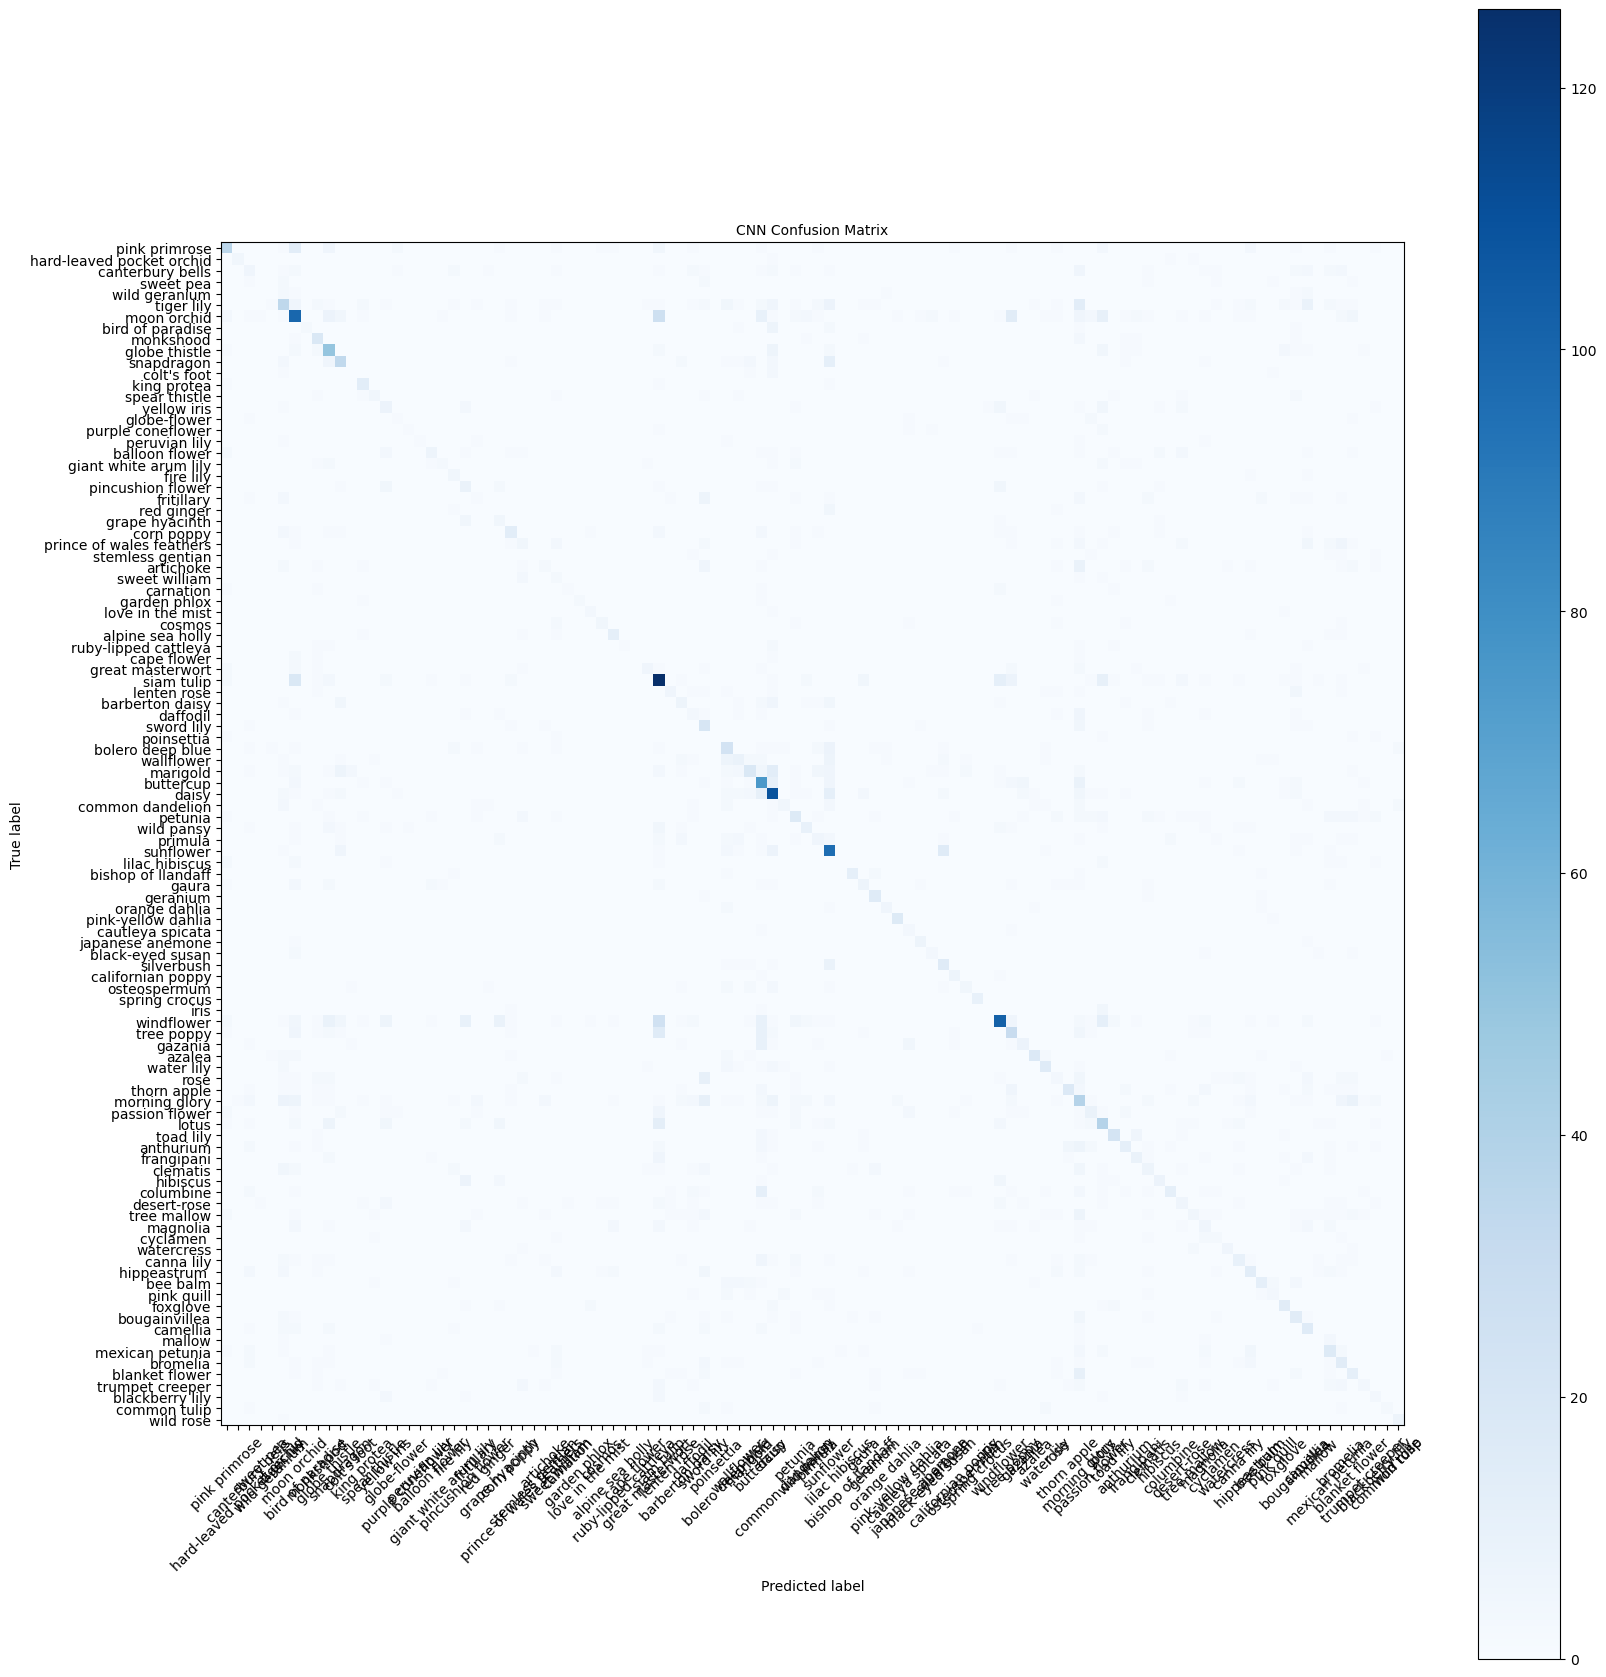

In [40]:
# Define plot_confusion_matrix function
def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(17, 17))  # Increase figure size
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title, fontsize=10)  # Increase title font size
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=10)  # Increase x-axis tick font size
    plt.yticks(tick_marks, classes, fontsize=10)  # Increase y-axis tick font size
    plt.tight_layout()
    plt.ylabel('True label', fontsize=10)  # Increase y-axis label font size
    plt.xlabel('Predicted label', fontsize=10)  # Increase x-axis label font size
    plt.show()

# Plot the confusion matrix using the plot_confusion_matrix function
plot_confusion_matrix(cnn_cm, CLASSES, 'CNN Confusion Matrix')


## Plotting the training/validation loss and accuracy for the My model

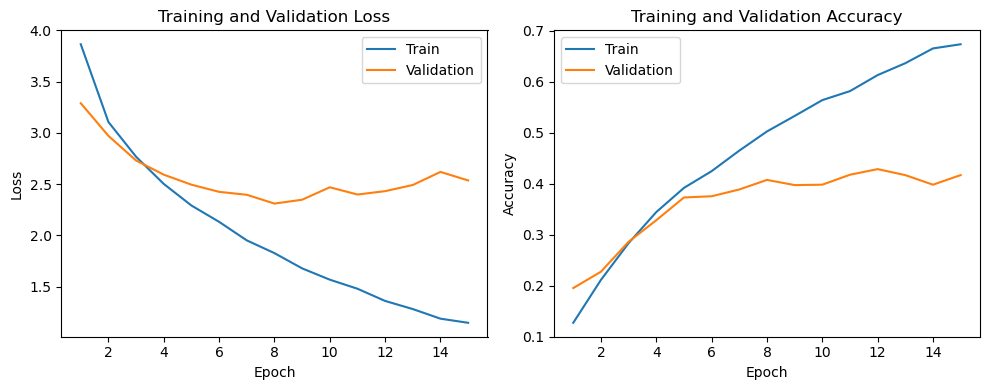

In [41]:
# Plotting the training/validation loss and accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_loss_history, label='Train')
plt.plot(range(1, num_epochs+1), val_loss_history, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_acc_history, label='Train')
plt.plot(range(1, num_epochs+1), val_acc_history, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Training and Evaluation of ResNet Model for Flower Classification

In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet50
import matplotlib.pyplot as plt

# Check if a GPU is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the pre-trained ResNet-50 model
model = resnet50(pretrained=True)
model.to(device)

# Modify the last fully connected layer for the number of flower classes (104)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 104)
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Define number of epochs
num_epochs = 10

# Training loop
train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []

# Training loop
for epoch in range(num_epochs):
    train_loss = 0.0
    train_correct = 0.0
    val_loss = 0.0
    val_correct = 0.0
    
    # Training phase
    model.train()
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Calculate training accuracy
        _, preds = torch.max(outputs, 1)
        train_correct += torch.sum(preds == labels.data)
        train_loss += loss.item() * images.size(0)
    
    # Validation phase
    model.eval()
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # Calculate validation accuracy
            _, preds = torch.max(outputs, 1)
            val_correct += torch.sum(preds == labels.data)
            val_loss += loss.item() * images.size(0)

    
    
    # Save metrics for plotting
    train_loss_history.append(train_loss / len(train_data))
    val_loss_history.append(val_loss / len(val_data))
    train_acc_history.append(train_correct.double() / len(train_data))
    val_acc_history.append(val_correct.double() / len(val_data))

    # Print epoch statistics
    print(f"Epoch: {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss_history[-1]:.4f}, Acc: {train_acc_history[-1]:.4f}")
    print(f"Val Loss: {val_loss_history[-1]:.4f}, Acc: {val_acc_history[-1]:.4f}")
    print()
    
    # Save the model after each epoch
torch.save(model.state_dict(), 'resnet_model.pth')


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch: 1/10
Train Loss: 2.7086, Acc: 0.4146
Val Loss: 1.5465, Acc: 0.6575

Epoch: 2/10
Train Loss: 1.2197, Acc: 0.7264
Val Loss: 0.8898, Acc: 0.7813

Epoch: 3/10
Train Loss: 0.7484, Acc: 0.8235
Val Loss: 0.6715, Acc: 0.8182

Epoch: 4/10
Train Loss: 0.5160, Acc: 0.8761
Val Loss: 0.5472, Acc: 0.8582

Epoch: 5/10
Train Loss: 0.3818, Acc: 0.9116
Val Loss: 0.4648, Acc: 0.8817

Epoch: 6/10
Train Loss: 0.2892, Acc: 0.9348
Val Loss: 0.4620, Acc: 0.8683

Epoch: 7/10
Train Loss: 0.2211, Acc: 0.9527
Val Loss: 0.4361, Acc: 0.8895

Epoch: 8/10
Train Loss: 0.1675, Acc: 0.9633
Val Loss: 0.4006, Acc: 0.9028

Epoch: 9/10
Train Loss: 0.1328, Acc: 0.9739
Val Loss: 0.4128, Acc: 0.8871

Epoch: 10/10
Train Loss: 0.1106, Acc: 0.9785
Val Loss: 0.4032, Acc: 0.8981



### Plotting the training/validation loss and accuracy for RESNET Model

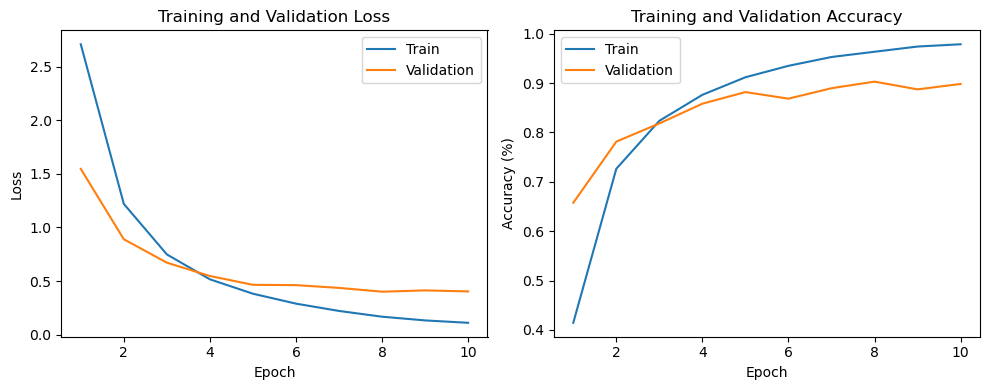

In [43]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_loss_history, label='Train')
plt.plot(range(1, num_epochs+1), val_loss_history, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
# Move tensors to CPU before plotting
train_acc_cpu = [acc.item() for acc in train_acc_history]
val_acc_cpu = [acc.item() for acc in val_acc_history]
plt.plot(range(1, num_epochs+1), train_acc_cpu, label='Train')
plt.plot(range(1, num_epochs+1), val_acc_cpu, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# google net model 

### try plotting 

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch: 1/10
Train Loss: 3.6143, Acc: 0.2261
Val Loss: 2.8711, Acc: 0.3817

Epoch: 2/10
Train Loss: 2.5159, Acc: 0.4384
Val Loss: 2.0755, Acc: 0.5384

Epoch: 3/10
Train Loss: 1.8817, Acc: 0.5858
Val Loss: 1.5725, Acc: 0.6481

Epoch: 4/10
Train Loss: 1.4854, Acc: 0.6677
Val Loss: 1.2692, Acc: 0.7069

Epoch: 5/10
Train Loss: 1.2149, Acc: 0.7231
Val Loss: 1.0860, Acc: 0.7445

Epoch: 6/10
Train Loss: 1.0192, Acc: 0.7647
Val Loss: 0.9534, Acc: 0.7641

Epoch: 7/10
Train Loss: 0.8768, Acc: 0.7921
Val Loss: 0.8395, Acc: 0.7955

Epoch: 8/10
Train Loss: 0.7523, Acc: 0.8235
Val Loss: 0.7654, Acc: 0.8158

Epoch: 9/10
Train Loss: 0.6694, Acc: 0.8399
Val Loss: 0.7089, Acc: 0.8260

Epoch: 10/10
Train Loss: 0.5915, Acc: 0.8595
Val Loss: 0.6513, Acc: 0.8315



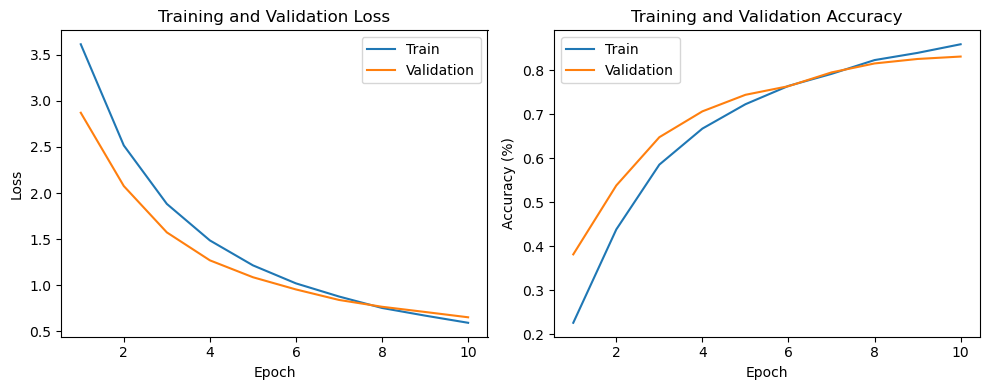

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import googlenet
import matplotlib.pyplot as plt

# Check if a GPU is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the pre-trained GoogLeNet model
model = googlenet(pretrained=True)
model.to(device)

# Modify the last fully connected layer for the number of flower classes (104)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 104)
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Define number of epochs
num_epochs = 10

# Initialize empty lists for training loss, validation loss, training accuracy, and validation accuracy history
train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []

# Training loop
for epoch in range(num_epochs):
    train_loss = 0.0
    train_correct = 0.0
    val_loss = 0.0
    val_correct = 0.0
    
    # Training phase
    model.train()
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Calculate training accuracy
        _, preds = torch.max(outputs, 1)
        train_correct += torch.sum(preds == labels.data)
        train_loss += loss.item() * images.size(0)
    
    # Validation phase
    model.eval()
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # Calculate validation accuracy
            _, preds = torch.max(outputs, 1)
            val_correct += torch.sum(preds == labels.data)
            val_loss += loss.item() * images.size(0)
    
    # Save metrics for plotting
    train_loss_history.append(train_loss / len(train_data))
    val_loss_history.append(val_loss / len(val_data))
    train_acc_history.append(train_correct.double() / len(train_data))
    val_acc_history.append(val_correct.double() / len(val_data))

    # Print epoch statistics
    print(f"Epoch: {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss_history[-1]:.4f}, Acc: {train_acc_history[-1]:.4f}")
    print(f"Val Loss: {val_loss_history[-1]:.4f}, Acc: {val_acc_history[-1]:.4f}")
    print()
    
    # Save the model after each epoch
torch.save(model.state_dict(), 'googlenet_model.pth')

# Plotting the training/validation loss and accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_loss_history, label='Train')
plt.plot(range(1, num_epochs+1), val_loss_history, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
# Move tensors to CPU before plotting
train_acc_cpu = [acc.item() for acc in train_acc_history]
val_acc_cpu = [acc.item() for acc in val_acc_history]
plt.plot(range(1, num_epochs+1), train_acc_cpu, label='Train')
plt.plot(range(1, num_epochs+1), val_acc_cpu, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Ensample Resnet model and Google net model  

In [54]:
import torch
import torch.nn as nn
from torchvision.models import googlenet, resnet50
from torchvision.transforms import ToTensor
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define paths for the pre-trained model weights
googlenet_path = "/kaggle/working/googlenet_model.pth"
resnet_path = "/kaggle/working/resnet_model.pth"

# Load the pre-trained GoogLeNet and ResNet models
googlenet_model = googlenet(pretrained=True)
googlenet_model.fc = nn.Linear(googlenet_model.fc.in_features, 104)
googlenet_model.load_state_dict(torch.load(googlenet_path))
googlenet_model.to(device)
googlenet_model.eval()

resnet_model = resnet50(pretrained=True)
resnet_model.fc = nn.Linear(resnet_model.fc.in_features, 104)
resnet_model.load_state_dict(torch.load(resnet_path))
resnet_model.to(device)
resnet_model.eval()



# Initialize variables for ensemble predictions
ensemble_correct = 0.0
ensemble_total = 0.0

# Iterate over the test dataset
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        # Pass images through GoogLeNet and ResNet models
        googlenet_outputs = googlenet_model(images)
        resnet_outputs = resnet_model(images)
        
        # Calculate ensemble predictions
        ensemble_outputs = googlenet_outputs + resnet_outputs
        _, ensemble_preds = torch.max(ensemble_outputs, 1)
        
        # Calculate ensemble accuracy
        ensemble_correct += torch.sum(ensemble_preds == labels.data)
        ensemble_total += labels.size(0)

# Calculate ensemble accuracy on the test dataset
ensemble_accuracy = ensemble_correct.double() / ensemble_total
print(f"Ensemble Accuracy on Test Data: {ensemble_accuracy:.4f}")


Ensemble Accuracy on Test Data: 0.9054


# Big Picture

## Compute the accuracy and Macro F-Score for evaluating Model Performance and Identifying Most Confused Classes

In [55]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize variables for ResNet performance
resnet_correct = 0.0
resnet_total = 0.0
resnet_predictions = []

# Initialize variables for GoogLeNet performance
googlenet_correct = 0.0
googlenet_total = 0.0
googlenet_predictions = []
resnet_model = resnet_model.to(device)
googlenet_model = googlenet_model.to(device)
# Iterate over the test dataset
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        # Pass images through ResNet model
        resnet_outputs = resnet_model(images)
        _, resnet_preds = torch.max(resnet_outputs, 1)

        # Update ResNet predictions and counts
        resnet_predictions.extend(resnet_preds.cpu().numpy())
        resnet_correct += torch.sum(resnet_preds == labels.data)
        resnet_total += labels.size(0)

        # Pass images through GoogLeNet model
        googlenet_outputs = googlenet_model(images)
        _, googlenet_preds = torch.max(googlenet_outputs, 1)

        # Update GoogLeNet predictions and counts
        googlenet_predictions.extend(googlenet_preds.cpu().numpy())
        googlenet_correct += torch.sum(googlenet_preds == labels.data)
        googlenet_total += labels.size(0)

# Calculate confusion matrices
resnet_confusion_matrix = confusion_matrix(test_dataset.targets, resnet_predictions)
googlenet_confusion_matrix = confusion_matrix(test_dataset.targets, googlenet_predictions)

# Get the most confused classes
resnet_most_confused_idx = np.unravel_index(resnet_confusion_matrix.argmax(), resnet_confusion_matrix.shape)
googlenet_most_confused_idx = np.unravel_index(googlenet_confusion_matrix.argmax(), googlenet_confusion_matrix.shape)

# Calculate ResNet accuracy and F-score
resnet_accuracy = resnet_correct.double() / resnet_total
resnet_macro_fscore = f1_score(test_dataset.targets, resnet_predictions, average='macro')

# Calculate GoogLeNet accuracy and F-score
googlenet_accuracy = googlenet_correct.double() / googlenet_total
googlenet_macro_fscore = f1_score(test_dataset.targets, googlenet_predictions, average='macro')

# Print results
print(f"ResNet Accuracy on Test Data: {resnet_accuracy:.4f}")
print(f"ResNet Macro F-Score on Test Data: {resnet_macro_fscore:.4f}")
print(f"ResNet Most Confused Classes: {resnet_most_confused_idx}")

print(f"GoogLeNet Accuracy on Test Data: {googlenet_accuracy:.4f}")
print(f"GoogLeNet Macro F-Score on Test Data: {googlenet_macro_fscore:.4f}")
print(f"GoogLeNet Most Confused Classes: {googlenet_most_confused_idx}")

ResNet Accuracy on Test Data: 0.8971
ResNet Macro F-Score on Test Data: 0.8815
ResNet Most Confused Classes: (68, 68)
GoogLeNet Accuracy on Test Data: 0.8521
GoogLeNet Macro F-Score on Test Data: 0.7593
GoogLeNet Most Confused Classes: (68, 68)


In [56]:
import torch
import pandas as pd
import torch.nn as nn
from sklearn.metrics import confusion_matrix
from IPython.display import display, HTML

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize empty lists for storing predictions and ground truth labels
googlenet_preds = []
googlenet_labels = []
resnet_preds = []
resnet_labels = []

# Iterate over the test dataset
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        # Pass images through GoogLeNet and ResNet models
        googlenet_outputs = googlenet_model(images)
        resnet_outputs = resnet_model(images)
        
        # Calculate predictions
        _, googlenet_pred = torch.max(googlenet_outputs, 1)
        _, resnet_pred = torch.max(resnet_outputs, 1)
        
        # Collect predictions and labels
        googlenet_preds.extend(googlenet_pred.cpu().numpy())
        googlenet_labels.extend(labels.cpu().numpy())
        resnet_preds.extend(resnet_pred.cpu().numpy())
        resnet_labels.extend(labels.cpu().numpy())

# Calculate confusion matrices
googlenet_cm = confusion_matrix(googlenet_labels, googlenet_preds)
resnet_cm = confusion_matrix(resnet_labels, resnet_preds)

# Convert confusion matrices to pandas DataFrames
googlenet_cm_df = pd.DataFrame(googlenet_cm, index=CLASSES, columns=CLASSES)
resnet_cm_df = pd.DataFrame(resnet_cm, index=CLASSES, columns=CLASSES)

# Display the confusion matrices as formatted tables
print("GoogLeNet Confusion Matrix")
display(HTML(googlenet_cm_df.to_html()))

print("\nResNet Confusion Matrix")
display(HTML(resnet_cm_df.to_html()))


GoogLeNet Confusion Matrix



ResNet Confusion Matrix


## Plot

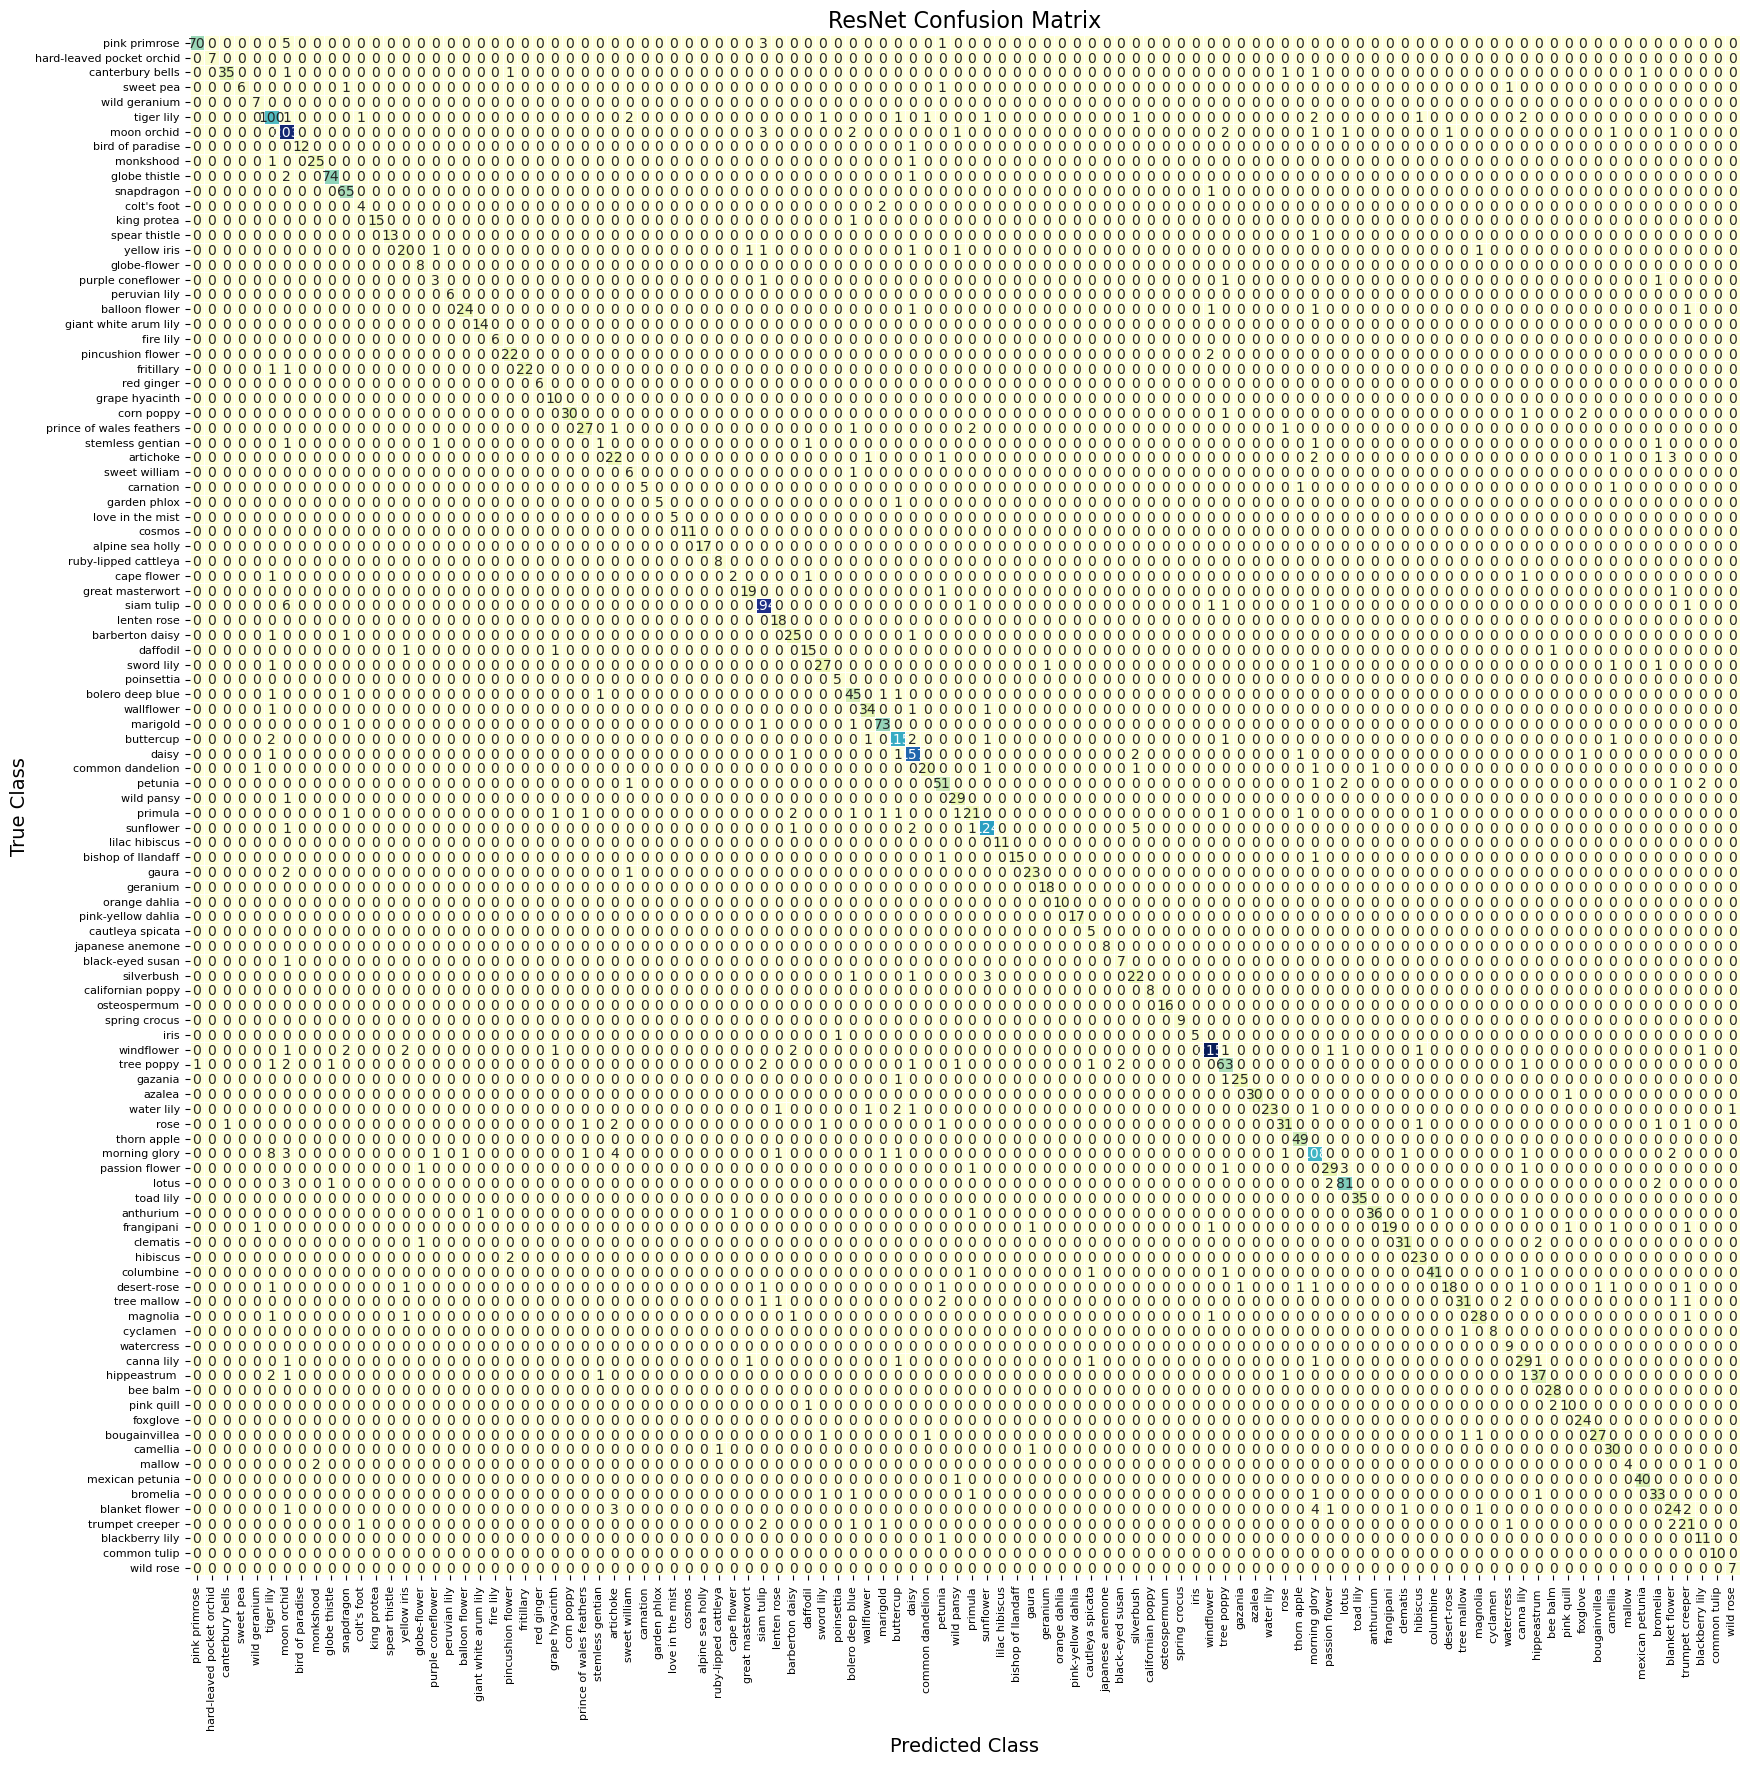

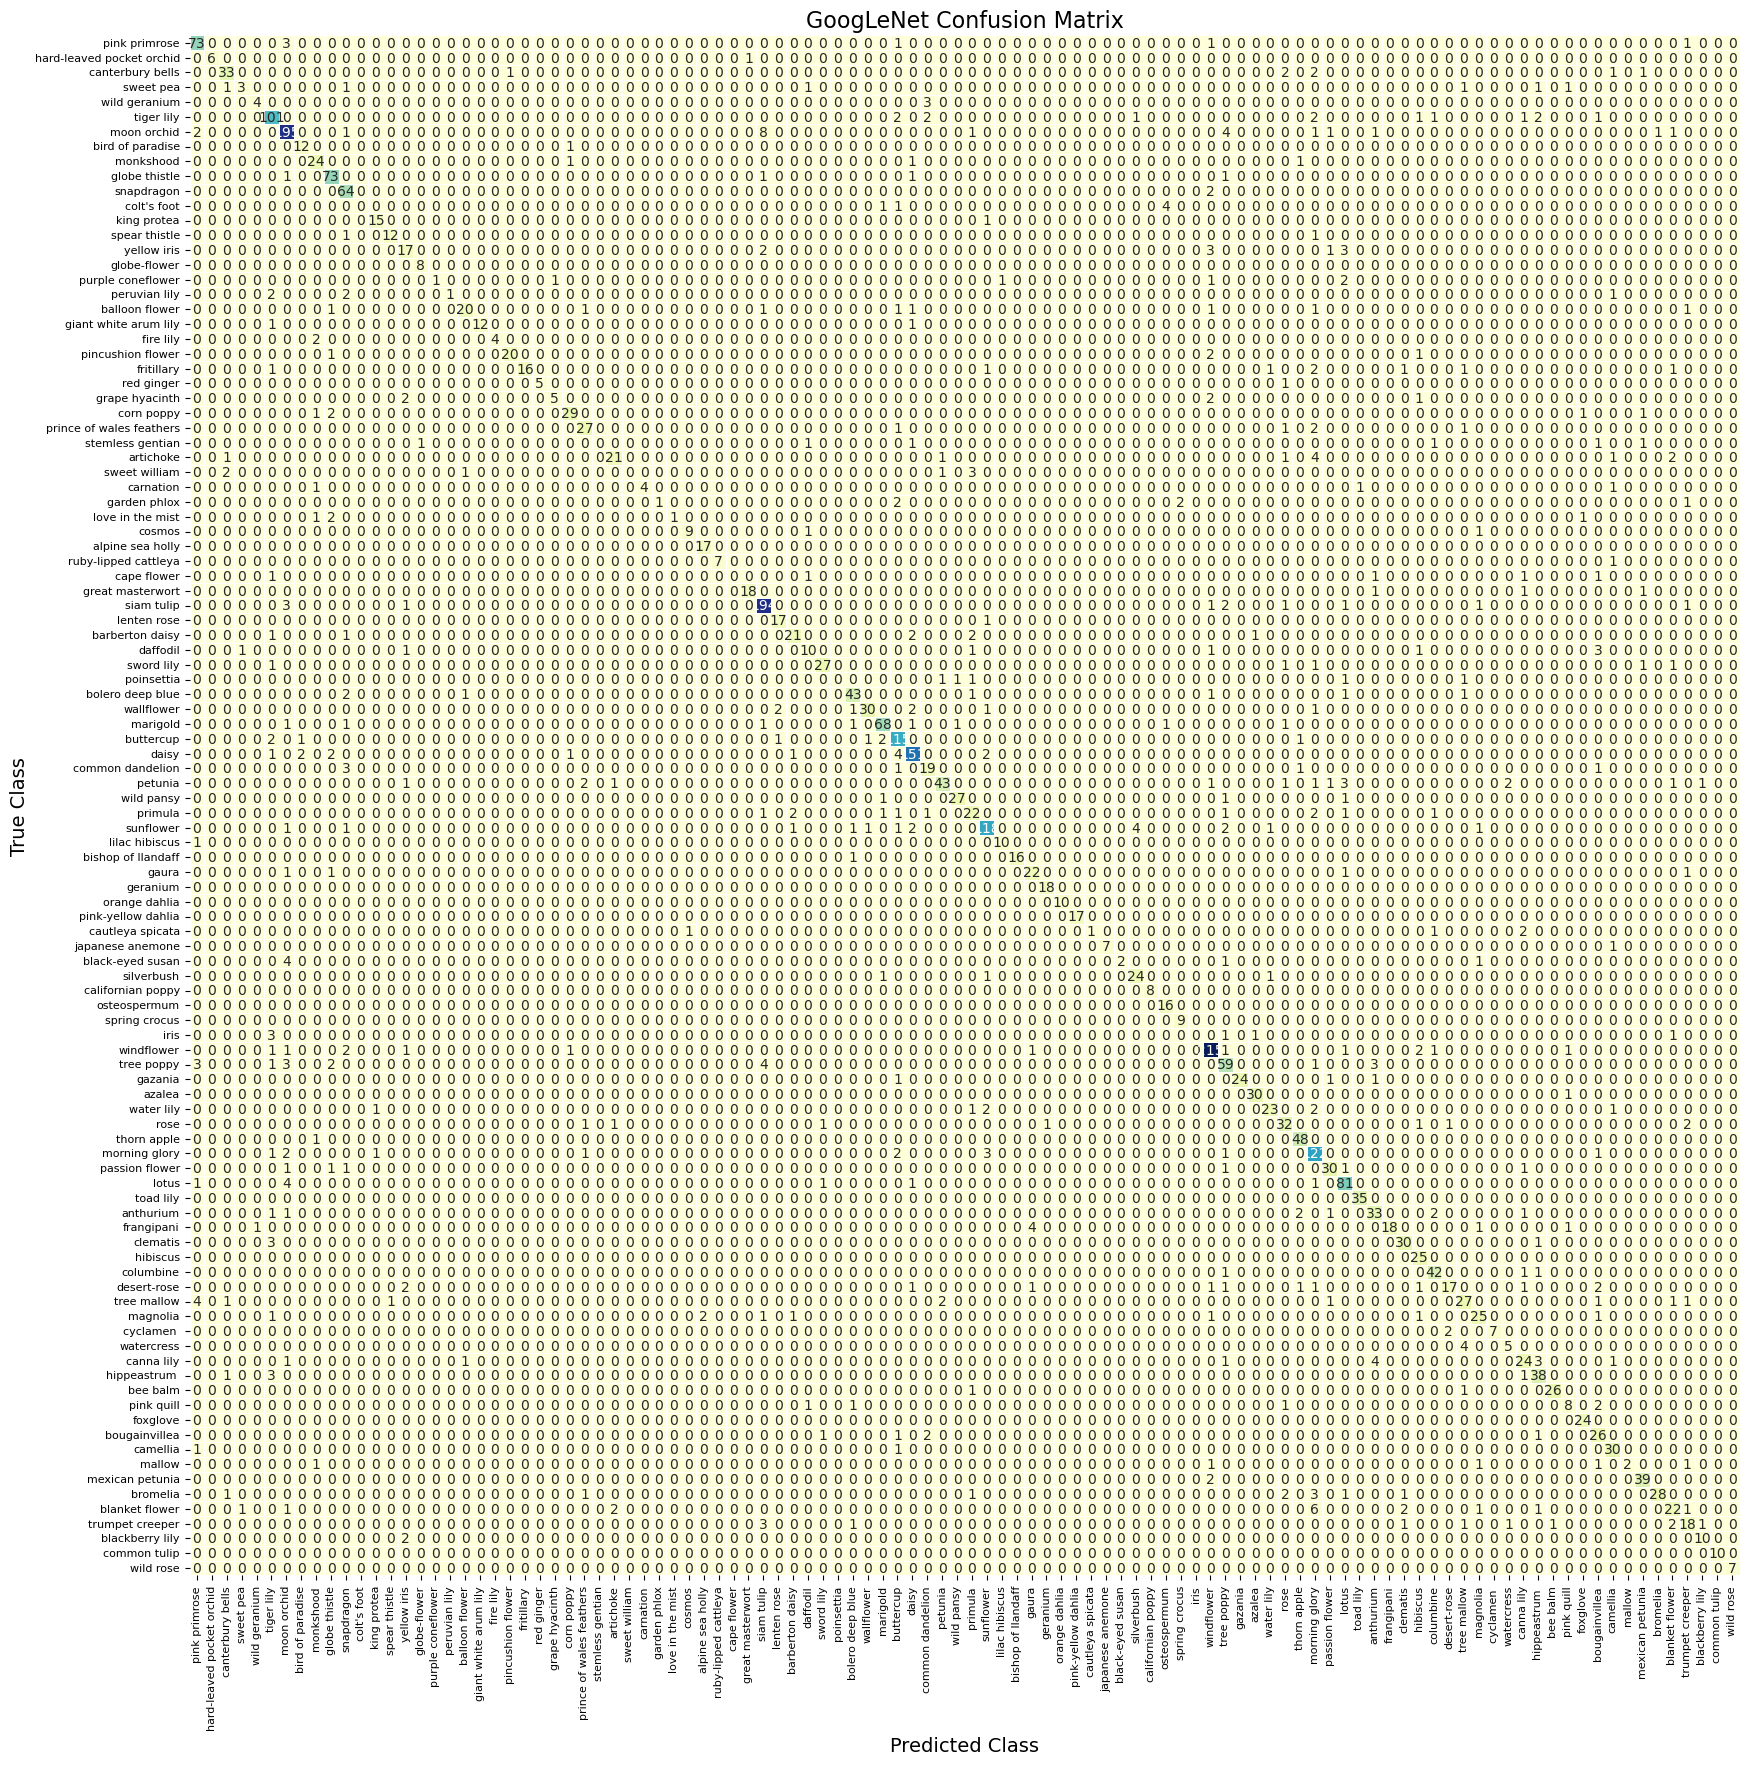

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(confusion_matrix, class_names, title):
    plt.figure(figsize=(20, 20))
    ax = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5,
                    xticklabels=class_names, yticklabels=class_names, cbar=False)

    plt.xlabel('Predicted Class', fontsize=14)
    plt.ylabel('True Class', fontsize=14)
    plt.title(title, fontsize=16)

    # Rotate x-axis labels and adjust font size
    ax.set_xticklabels(class_names, rotation=90, fontsize=8)
    ax.set_yticklabels(class_names, fontsize=8)

    plt.show()
plot_confusion_matrix(resnet_confusion_matrix, CLASSES, 'ResNet Confusion Matrix')
plot_confusion_matrix(googlenet_confusion_matrix, CLASSES, 'GoogLeNet Confusion Matrix')    